# Project - Convolutional Neural Networks: Street View Housing Number Digit Recognition
by Adam M. Lang<br>
December 9, 2020<br>

----
### Context: 
-------

The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications. The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations. This is a great benchmark dataset to play with, learn and train models that accurately identify street numbers, and incorporate into all sorts of projects.

---------
### Objective:
------------
The objective of the exercise is to perform an image classification exercise on the given dataset to come up with a model that can help identify the digit images which have issues like picture brightness, blurriness. 

--------
### More about the dataset
------------
- The dataset is provided as a .h5 file. 





### Mount the drive
Let us start by mounting the drive.

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [144]:
import tensorflow as tf
print(tf.__version__)

2.3.0


### Load the dataset
- Let us now, load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [145]:
import h5py
import numpy as np

# Open the file as readonly
# Make changes in path as required
h5f = h5py.File('/content/drive/MyDrive/Colab Notebooks/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]


# Close this file
h5f.close()

Let us import the required libraries now.

In [146]:
## Importing the required libraries
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

### Visualizing images
- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

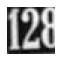

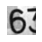

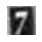

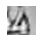

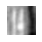

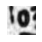

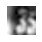

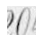

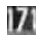

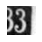

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [147]:
# visualizing the first 10 images in the dataset and their labels
# Uncomment and fill in the blanks


%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(X_train[i].reshape(32,32), cmap="gray")
  plt.axis('off')
  plt.show()
print('label for each of the above image: %s' % (y_train1[0:10]))

### Data preparation

- Print the first image in the train image and figure out the shape of the images.
- Reshape the train and the test dataset to make them fit the first convolutional operation that we will create later. Figure out the required shape.
- Normalise the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test set. 
- One hot encode the target variables.

Shape: (32, 32)



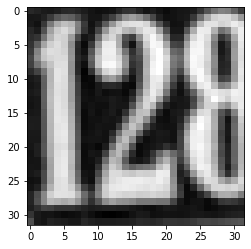

First image:
 2


In [148]:
# Shape of the images and the first image
# Uncomment and fill in the blanks

print("Shape:", X_train[0].shape)
print()
plt.imshow(X_train[0],cmap='gray')    
plt.show()
print("First image:\n", y_train1[0])

In [149]:
# Reshaping the dataset to flatten them. Remember that we are trying to reshape the 2D image data into a 3D data where there is just one channel

#Uncomment below to answer
img_rows, img_cols = 32, 32

x_train = X_train.reshape(X_train.shape[0], img_rows,img_cols,1)
x_test = X_test.reshape(X_test.shape[0], img_rows,img_cols, 1)

print(x_train.shape)
print(x_test.shape)

(42000, 32, 32, 1)
(18000, 32, 32, 1)


In [150]:
# Normalize inputs from 0-255 to 0-1

# Your code here

#For CNN 
x_train = x_train.astype('float32')
x_test =  x_test.astype('float32')

#Normalizing the input
x_train = x_train / 255.0
x_test = x_test / 255.0


In [151]:
# New shape 
print(f"The new shape of the x_train set is:",x_train.shape)
print(f"The new shape of the x_test set is:", x_test.shape)


The new shape of the x_train set is: (42000, 32, 32, 1)
The new shape of the x_test set is: (18000, 32, 32, 1)


In [152]:
# one hot encode output
# Your code here

y_train = tf.keras.utils.to_categorical(y_train1,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test1,num_classes=10)

print(x_train.shape, x_test.shape,y_train.shape, y_test.shape)

(42000, 32, 32, 1) (18000, 32, 32, 1) (42000, 10) (18000, 10)


### Model Building
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with 16 filters and kernel size =3. Use the 'same' padding and provide apt input shape.
 - Add a leaky relu layer next with the value 0.1
 - First Convolutional layer with 32 filters and kernel size =3. Use the 'same' padding.
 - Another leakyRelu same as above.
 - A maxpooling layer with pool size of 2
 - Flatten the output from the previous layer
 - Add a dense layer with 32 nodes
 - Add a leakyRelu layer with slope(0.1)
 - Add the final output layer with nodes equal to the number of classes and softmax activation.
 - Compile the model with the categorical_crossentropy loss, adam optmizers (lr = 0.001) and accuracy metric.
- Do not fit the model here, just return the compiled model
- Call the model and print the model summary
- Fit the model on the train data with a validation split of 0.2, batch size = 32, verbose = 1 and 20 epochs. Store the model building history to use it later for visualisation.


In [153]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

# Uncomment below to answer

def cnn_model_1():
  model_1 = Sequential()
  #Your code here
  #First convolutional layer with 16 filters, kernel size 3, padding same and input shape
  model_1.add(Conv2D(filters=16, kernel_size=3, padding="same", input_shape=(32,32,1)))

  #Add leaky relu layer with value 0.1
  model_1.add(LeakyReLU(0.1))

  #First convoluational layer with 32 filters, kernel size 3, use same padding.
  model_1.add(Conv2D(filters=32, kernel_size=3, padding="same"))

  #Add another leakyRelu same as above
  model_1.add(LeakyReLU(0.1))

  #Maxpooling layer with pool size of 2
  model_1.add(MaxPooling2D(pool_size=2))

  #Flatten output from previous layer
  model_1.add(Flatten())

  #Add a dense layer with 32 nodes
  model_1.add(Dense(32))

  #Add a leakyRelu layer with slope of 0.1
  model_1.add(LeakyReLU(0.1))

  #Add the final output layer with nodes equal to the number of classes and softmax activation.
  model_1.add(Dense(10, activation='softmax'))

  # Compile model
  adam = tf.keras.optimizers.Adam(lr=1e-3)
  model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model_1



In [154]:
# Call the function and print the model summary

#call function
model_1 = cnn_model_1()

#print model summary
model_1.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu_57 (LeakyReLU)   (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_58 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 32)              

In [155]:
# Fit the model and save the history
# Uncomment below to answer

history_model_1 = model_1.fit(
                  x_train, y_train,
                  epochs=20,
                  validation_data=(x_test,y_test),
                  validation_split=0.2,
                  batch_size=32,
                  verbose=1)




Epoch 1/20
1050/1050 [==============================] - 4s 4ms/step - loss: 1.1375 - accuracy: 0.6243 - val_loss: 0.6066 - val_accuracy: 0.8273
Epoch 2/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.5253 - accuracy: 0.8469 - val_loss: 0.5265 - val_accuracy: 0.8470
Epoch 3/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.4356 - accuracy: 0.8697 - val_loss: 0.4804 - val_accuracy: 0.8636
Epoch 4/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3799 - accuracy: 0.8880 - val_loss: 0.4560 - val_accuracy: 0.8677
Epoch 5/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3383 - accuracy: 0.8988 - val_loss: 0.4361 - val_accuracy: 0.8779
Epoch 6/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3013 - accuracy: 0.9090 - val_loss: 0.4405 - val_accuracy: 0.8799
Epoch 7/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.2660 - accuracy: 0.9198 - val_loss: 0.4587 - val_accuracy:

### Plotting the validation and training accuracies

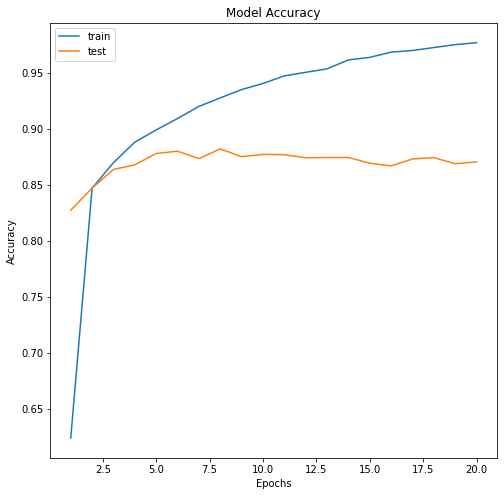

In [156]:
# plotting the accuracies


dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))

plt.plot(list_ep,dict_hist['accuracy'])
plt.plot(list_ep, dict_hist['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title("Model Accuracy")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Comments**
- The Training data appears to be more accurate than the testing data when run through the model. The model increases accuracy as the epochs increases to 20 finally reaching an accuracy of about 98%. 
- The testing data is rather interesting when run through the model. It appears that the accuracy starts out at just above 80% and then at about 7.5 epochs it peaks at about 87% accuracy and then wavers around that number staying consistent until the 20th epoch.
- I guess we can say the model is consistent if the accuracy stays the same at above 85% for a majority of the iterations/epochs. 

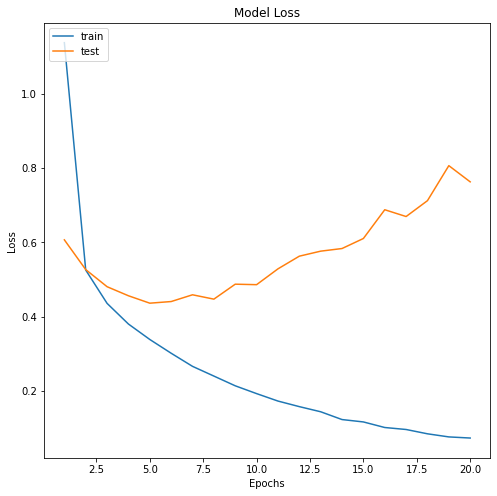

In [157]:
# plotting the model loss
# Uncomment and fill in the blanks


dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))

plt.plot(list_ep,dict_hist['loss'])
plt.plot(list_ep, dict_hist['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title("Model Loss")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Comments**
- The model loss is plotted above. The loss for the training set minimizes over the 20 epochs consistently shrinking to almost zero. 
- The model loss for the test set is far worse and increases as the number of epochs increases indicating it is not a good model. The loss increases to almost 0.8. 

### Iteration 2
- Experiment with adding dropout layers to make the model generalise better and report the results.
- Feel free to explore various architectures that can help you generalise better.
- Repeat all the steps done above and plot the results

In [158]:
#Uncomment below and complete 

def cnn_model_2():
  model_2 = Sequential()

  #First convolutional layer with 16 filters, kernel size 3, padding same and input shape
  model_2.add(Conv2D(filters=16, kernel_size=3, padding="same", input_shape=(32,32,1)))

  #Add leaky relu layer with value 0.1
  model_2.add(LeakyReLU(0.1))

  # adding dropout to randomly switch off 20% neurons to reduce overfitting
  model_2.add(Dropout(0.2))

  #Second convoluational layer with 32 filters, kernel size 3, use same padding.
  model_2.add(Conv2D(filters=32, kernel_size=3, padding="same"))

  #Add another leakyRelu same as above
  model_2.add(LeakyReLU(0.1))

  # adding max pooling to reduce the size of output of second conv layer
  model_2.add(MaxPooling2D(pool_size=2))

  # adding dropout to randomly switch off 25% neurons to reduce overfitting
  model_2.add(Dropout(0.25))

  # add third conv layer with 32 filters and with kernel size 3
  model_2.add(Conv2D(filters=32, kernel_size=3, padding='same'))

  # add leaky relu activation function with negative slope of 0.1
  model_2.add(LeakyReLU(0.1))

  # add fourth conv layer with 64 filters and with kernel size 3
  model_2.add(Conv2D(filters=64, kernel_size=3, padding='same'))

  # adding leaky relu activation function with negative slope of 0.1
  model_2.add(LeakyReLU(0.1))

  #Maxpooling layer with pool size of 2
  model_2.add(MaxPooling2D(pool_size=2))

  # adding dropout to randomly switch off 50% of network to reduce overfitting
  model_2.add(Dropout(0.50))

  #Flatten output from previous layer
  model_2.add(Flatten())

  #Add a dense layer with 32 nodes
  model_2.add(Dense(32))

  #Add a leakyRelu layer with slope of 0.1
  model_2.add(LeakyReLU(0.1))

  # adding dropout to randomly switch off 50% neurons to reduce overfitting
  model_2.add(Dropout(0.5))

  #Add the final output layer with nodes equal to the number of classes and softmax activation.
  model_2.add(Dense(10, activation='softmax'))


  # Compile model
  adam = tf.keras.optimizers.Adam(lr=1e-3)
  model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model_2



In [159]:
#Call the function and print model summary

#Your code here
#call function
model_2 = cnn_model_2()

#print model summary
model_2.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 32, 32, 16)        160       
_________________________________________________________________
leaky_re_lu_60 (LeakyReLU)   (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_61 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 16, 16, 32)      

In [160]:
# Fit the model
# Uncomment below and complete
history_model_2 = model_2.fit( x_train, y_train,
                  epochs=20,
                  validation_data=(x_test,y_test),
                  validation_split=0.2,
                  batch_size=32,
                  verbose=1)

Epoch 1/20
1050/1050 [==============================] - 5s 5ms/step - loss: 2.2798 - accuracy: 0.1128 - val_loss: 1.5747 - val_accuracy: 0.4605
Epoch 2/20
1050/1050 [==============================] - 5s 5ms/step - loss: 1.0667 - accuracy: 0.6512 - val_loss: 0.5886 - val_accuracy: 0.8263
Epoch 3/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.7617 - accuracy: 0.7604 - val_loss: 0.4835 - val_accuracy: 0.8575
Epoch 4/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.6730 - accuracy: 0.7926 - val_loss: 0.4555 - val_accuracy: 0.8673
Epoch 5/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.6182 - accuracy: 0.8088 - val_loss: 0.4191 - val_accuracy: 0.8827
Epoch 6/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.5936 - accuracy: 0.8182 - val_loss: 0.3878 - val_accuracy: 0.8912
Epoch 7/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.5582 - accuracy: 0.8271 - val_loss: 0.3702 - val_accuracy:

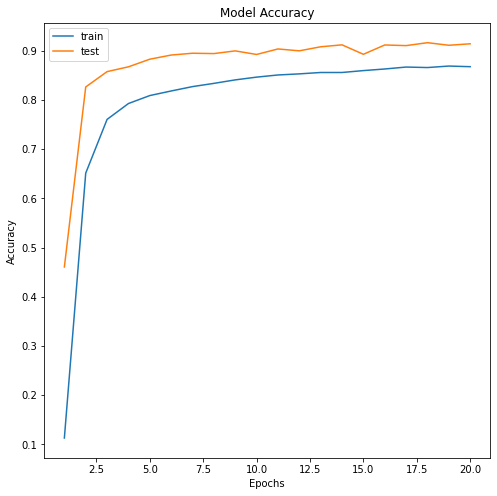

In [161]:
# plotting the accuracies

#Your code here

dict_hist = history_model_2.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))

plt.plot(list_ep,dict_hist['accuracy'])
plt.plot(list_ep, dict_hist['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title("Model Accuracy")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Comments:
- This is a much improved model than the first iteration. This 2nd model did much better on the test set with an accuracy of around 85% starting at epoch 5 and continuing to stay around 90% accuracy or better until the 20th epoch. This proves the model performs much better than the previous model on data it has not seen (test data). 
- The training data also remained just as consistent this time with the test data but with slightly less accuracy in the mid 80% range and steadily improving to the 20th epoch at just below 90%. 

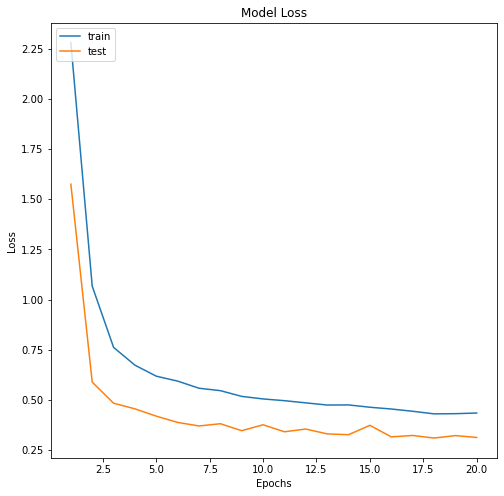

In [163]:
# plotting the model loss
# Uncomment and fill in the blanks


dict_hist = history_model_2.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))

plt.plot(list_ep,dict_hist['loss'])
plt.plot(list_ep, dict_hist['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title("Model Loss")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Comments**
- The model loss is significantly improved mostly for the test set indicating model_2 is a much better model. The loss decreases quickly and continues to decrease all the way to the 20th epoch for the test data and training data respectively. 
- This means the model continues to make better predictions of the images on the test data and performs better than the training data.

**Comments**

### Test set prediction and final comments (Using the better model of the two iterations)
- predict on the test set and comment on the results obtained.


In [164]:
#making predictions on test set
y_pred_test = model_2.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [165]:
# Evaluate model on test data
test_loss, test_acc = model_2.evaluate(x=x_test, y=y_pred_test, verbose=1)

print('Test accuracy is: {:0.4f} \nTest loss is: {:0.4f}'.
      format(test_acc, test_loss))

563/563 [==============================] - 2s 3ms/step - loss: 0.2865 - accuracy: 1.0000
Test accuracy is: 1.0000 
Test loss is: 0.2865


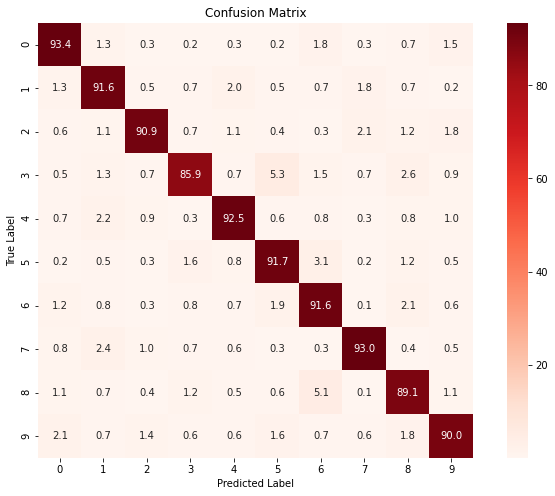

In [166]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))

# Calculate the confusion matrix
cm = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=y_pred_test_classes)

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100.0

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Reds', fmt='.1f', square=True);
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Comments
- The accuracy is significant at 1.00 for the predictions the model makes. 
- The confusion matrix shows that for example when predicting a 9, 90% of the time you will get a 9. When predicting a 5, 91.7% of the time you will get a 5. 
- The confusion matrix also shows us that if we predict a 3, 1.2% of the time we will get an 8, but also if we predict a 3, 85.9% of the time we will get a 3 so we are still getting more accurate predictions.
- So what this means is that the model is very accurate. 
- The accuracy score is 1.00 on the test set, and the loss is 0.2865 which is very low and minimized which we would like. 
- Overall we can say that CNN model_2 performed very well on the image dataset and the task of predicting and identifying digit images. 
